In [2]:
#(1) 데이터 가져오기
import pandas as pd
train = pd.read_csv('~/development/Aiffel/Aiffel_Online5/Exploration1/train.csv') # 로컬에서 진행했습니다.
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
# (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

train['datetime'] = pd.to_datetime(train['datetime'])
#train.info()
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


<Axes: xlabel='second', ylabel='count'>

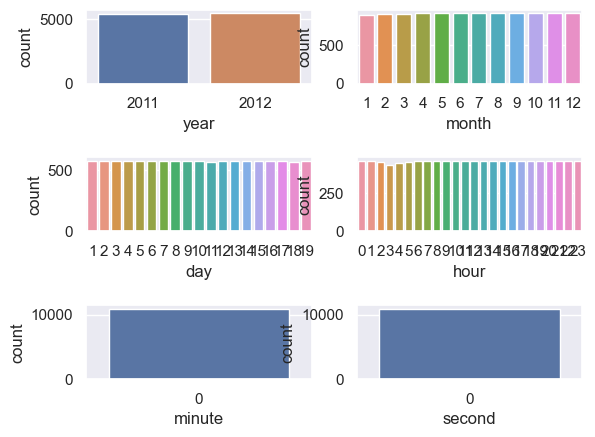

In [4]:
#(3) year, month, day, hour, minuate, second 데이터 개수 시각화하기
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='darkgrid')
fig, ax = plt.subplots(nrows = 3, ncols = 2)
plt.subplots_adjust(hspace=1)
sns.countplot(x='year', data=train, ax=ax[0][0])
sns.countplot(x='month', data=train, ax=ax[0][1])
sns.countplot(x='day', data=train, ax=ax[1][0])
sns.countplot(x='hour', data=train, ax=ax[1][1])
sns.countplot(x='minute', data=train, ax=ax[2][0])
sns.countplot(x='second', data=train, ax=ax[2][1])

<Axes: xlabel='day', ylabel='count'>

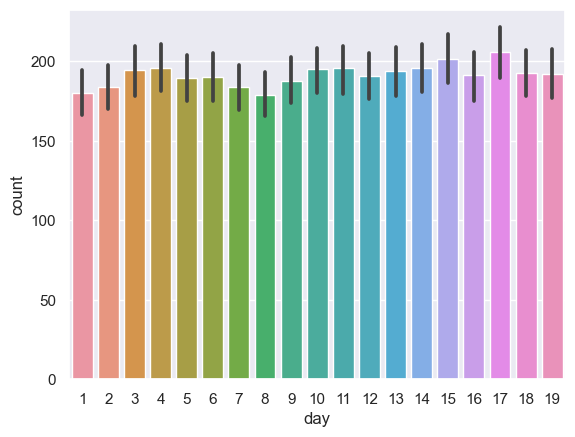

In [6]:
# (4) X, y 컬럼 선택 및 train/test 데이터 분리
#sns.barplot(x='year', data=train, y='count') #사용
#sns.barplot(data = train, x = 'month', y = 'count') #사용
sns.barplot(data = train, x = 'day', y = 'count') #제거
#sns.barplot(data = train, x = 'hour', y = 'count') #사용
#sns.barplot(data = train, x = 'season', y = 'count') #사용
#sns.pointplot(data = train, x = 'hour', y = 'count', hue='workingday') #사용
#sns.pointplot(data = train, x = 'hour', y = 'count', hue='holiday') #사용
#sns.pointplot(data = train, x = 'hour', y = 'count', hue='weather') #사용

<Axes: >

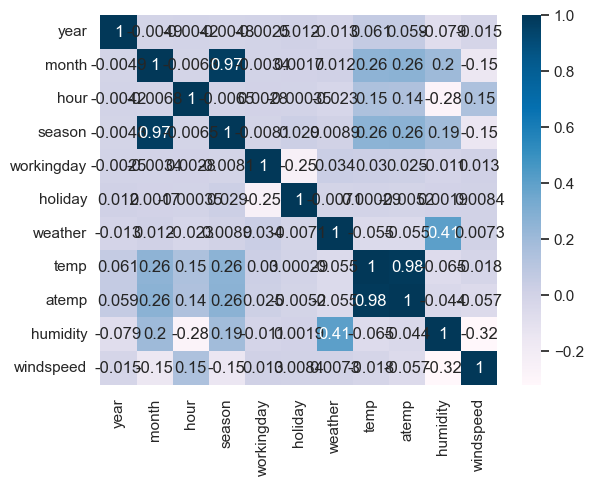

In [6]:
data = train[['year', 'month', 'hour', 'season', 'workingday', 'holiday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed']]
colormap = plt.cm.PuBu
sns.heatmap(data.corr(),annot=True, cmap=colormap) # 변수끼리 상관관계가 너무 높은 [month/season], [temp/atemp] 중 month, temp만 사용

<Axes: xlabel='humidity', ylabel='count'>

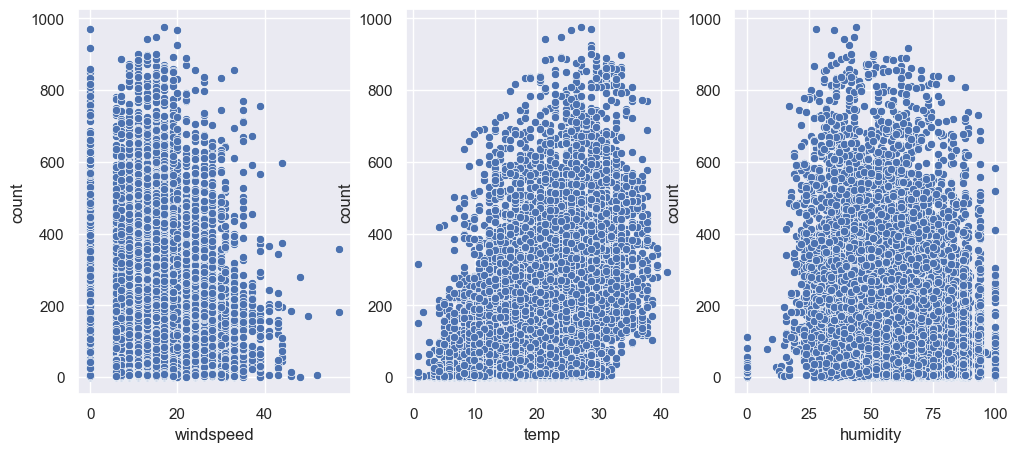

In [7]:
fig, ax = plt.subplots(ncols=3, figsize = (12, 5))
sns.scatterplot(data=train, x='windspeed', y='count', ax=ax[0])
sns.scatterplot(data=train, x='temp', y='count', ax=ax[1])
sns.scatterplot(data=train, x='humidity', y='count', ax=ax[2])
#windspeed가 0인 데이터가 너무 많음

In [8]:
train['windspeed'].value_counts() # 0이 너무 많아서, 결측치를 0으로 채웠다고 판단
# windspeed와 상관관게가 높은 humidity 사용

temp = train.loc[train['windspeed'] != 0]
temp.groupby((temp['humidity'] > 0)&(temp['humidity']<= 20)).agg('mean')['windspeed']
#0~20:26.000123 21~40: 18.708365 41~60: 15.654742 61~80: 12.703569 81~100:12.175005

wind0 = train.loc[train['windspeed'] == 0]
for i, j, k in [(-1,20,26.000123),(20,40,18.708365),(40,60,15.654742),[60,80,12.703569],[80,100,12.175005]]:
       wind0.loc[(wind0['humidity'] > i)&(wind0['humidity']<=j),'windspeed'] = k

train = pd.concat([temp, wind0]).sort_values(by='datetime')
train = train.reset_index(drop=True)
train

# 구간별 평균으로 채워넣음
    
    

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,12.175005,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,12.703569,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,12.703569,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,12.703569,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,12.703569,0,1,1,2011,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.002700,7,329,336,2012,12,19,19,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.001300,10,231,241,2012,12,19,20,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.001300,4,164,168,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.003200,12,117,129,2012,12,19,22,0,0


In [9]:
from sklearn.model_selection import train_test_split

X = train.drop(columns=['datetime','registered', 'casual', 'second', 'minute', 'day','count','atemp']).values
y = train['count'].values
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state= 1)

In [10]:
x_train

array([[4.000e+00, 0.000e+00, 0.000e+00, ..., 2.012e+03, 1.000e+01,
        0.000e+00],
       [2.000e+00, 0.000e+00, 1.000e+00, ..., 2.012e+03, 5.000e+00,
        2.100e+01],
       [4.000e+00, 0.000e+00, 0.000e+00, ..., 2.012e+03, 1.200e+01,
        9.000e+00],
       ...,
       [1.000e+00, 0.000e+00, 1.000e+00, ..., 2.011e+03, 3.000e+00,
        4.000e+00],
       [4.000e+00, 0.000e+00, 0.000e+00, ..., 2.011e+03, 1.200e+01,
        1.000e+01],
       [1.000e+00, 0.000e+00, 1.000e+00, ..., 2.011e+03, 1.000e+00,
        2.000e+00]])

In [11]:
# (5) LinearRegression 모델 학습
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [12]:
# (6) 학습된 모델로 x_test에 대한 예측값 출력 및 손실함수 계산
from sklearn.metrics import mean_squared_error
import numpy as np

pred = model.predict(x_test)
print(pred) # 에측값 출력
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print(f'mse:{mse}  rmse:{rmse}')

[180.28628556  59.05719448 374.69082412 ... 110.91502704 -61.49454013
 -34.22381576]
mse:20767.75949759104  rmse:144.11023384059524


In [13]:
x_test

array([[3.000e+00, 1.000e+00, 0.000e+00, ..., 2.011e+03, 9.000e+00,
        1.100e+01],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 2.012e+03, 3.000e+00,
        4.000e+00],
       [4.000e+00, 0.000e+00, 0.000e+00, ..., 2.012e+03, 1.000e+01,
        1.700e+01],
       ...,
       [2.000e+00, 0.000e+00, 1.000e+00, ..., 2.012e+03, 4.000e+00,
        5.000e+00],
       [1.000e+00, 0.000e+00, 1.000e+00, ..., 2.011e+03, 1.000e+00,
        0.000e+00],
       [1.000e+00, 1.000e+00, 0.000e+00, ..., 2.011e+03, 1.000e+00,
        2.000e+00]])

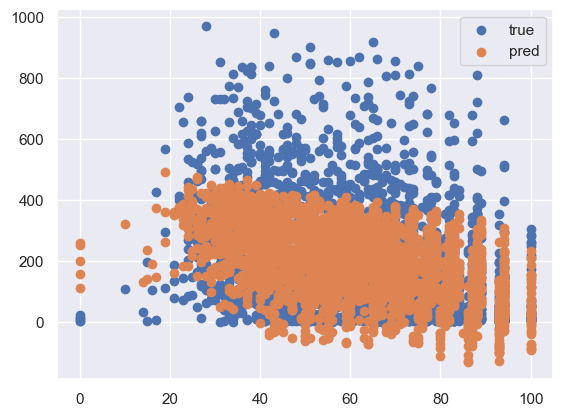

In [16]:
plt.scatter(x_test[:,5],y_test, label = 'true')
plt.scatter(x_test[:,5],pred, label = 'pred')
plt.legend()
plt.show()